In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import statsmodels.api as sm


In [133]:
datos = pd.read_excel("/content/compendio.xlsx")   #dataFrame
datos.head()

,año,ingresos,gastos,utiliad,entrada de personas,salida de personas,flujo de turismo
0,2005,1891000000,1934000000,-43000000,981000,1553000,-572000
1,2006,2370000000,2171000000,199000000,2096000,1790500,305500
2,2007,2616000000,2501000000,115000000,2381000,2028000,353000
3,2008,2966000000,2819000000,147000000,2545000,2042000,503000
4,2009,3080000000,2841000000,239000000,2649000,2122000,527000


In [134]:
# Solicito información general de la base de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   año                  16 non-null     int64
 1   ingresos             16 non-null     int64
 2   gastos               16 non-null     int64
 3   utiliad              16 non-null     int64
 4   entrada de personas  16 non-null     int64
 5   salida de personas   16 non-null     int64
 6   flujo de turismo     16 non-null     int64
dtypes: int64(7)
memory usage: 1.0 KB


In [135]:
# Estadísticas descriptivas de las tres variables cuantitativas
datos.describe()

,año,ingresos,gastos,utiliad,entrada de personas,salida de personas,flujo de turismo
count,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01
mean,2012.500000,4.163438e+09,3.826062e+09,3.373750e+08,2.751875e+06,2.930031e+06,-1.781562e+05
std,4.760952,1.620856e+09,1.388112e+09,4.113694e+08,1.026423e+06,1.078320e+06,5.121199e+05
min,2005.000000,1.891000e+09,1.576000e+09,-3.580000e+08,9.810000e+05,1.275000e+06,-1.045000e+06
25%,2008.750000,2.878500e+09,2.739500e+09,1.390000e+08,2.291000e+06,2.038500e+06,-5.892500e+05
50%,2012.500000,4.125000e+09,4.075000e+09,2.330000e+08,2.570000e+06,2.845500e+06,-4.550000e+04
75%,2016.250000,5.368500e+09,4.952250e+09,4.782500e+08,3.447000e+06,3.874250e+06,1.671250e+05
max,2020.000000,6.784000e+09,5.658000e+09,1.126000e+09,4.531000e+06,4.479000e+06,5.270000e+05


In [136]:
# Calculo el promedio de los gastos del turismo
datos['gastos'].mean(), datos.gastos.mean(), np.mean(datos['gastos'])

(3826062500.0, 3826062500.0, 3826062500.0)

In [137]:
# Calculo el promedio de los gastos del turismo
datos['ingresos'].mean(), datos.ingresos.mean(), np.mean(datos['ingresos'])

(4163437500.0, 4163437500.0, 4163437500.0)

In [138]:
# Calculo el promedio de los gastos del turismo
datos['utiliad'].mean(), datos.utiliad.mean(), np.mean(datos['utiliad'])

(337375000.0, 337375000.0, 337375000.0)

In [139]:
# Calculo una variable secundaria a partir de variables originarias
#por cada ingreso en el pais cuanto se destina para cubrir el gasto? todo en materia de turismo
datos['cobertura'] = datos['ingresos']/datos['gastos']
datos.head()

,año,ingresos,gastos,utiliad,entrada de personas,salida de personas,flujo de turismo,cobertura
0,2005,1891000000,1934000000,-43000000,981000,1553000,-572000,0.977766
1,2006,2370000000,2171000000,199000000,2096000,1790500,305500,1.091663
2,2007,2616000000,2501000000,115000000,2381000,2028000,353000,1.045982
3,2008,2966000000,2819000000,147000000,2545000,2042000,503000,1.052146
4,2009,3080000000,2841000000,239000000,2649000,2122000,527000,1.084125


In [140]:
datos

,año,ingresos,gastos,utiliad,entrada de personas,salida de personas,flujo de turismo,cobertura
0,2005,1891000000,1934000000,-43000000,981000,1553000,-572000,0.977766
1,2006,2370000000,2171000000,199000000,2096000,1790500,305500,1.091663
2,2007,2616000000,2501000000,115000000,2381000,2028000,353000,1.045982
3,2008,2966000000,2819000000,147000000,2545000,2042000,503000,1.052146
4,2009,3080000000,2841000000,239000000,2649000,2122000,527000,1.084125
5,2010,3473000000,3228000000,245000000,1701000,2342000,-641000,1.075898
6,2011,3841000000,3689000000,152000000,2356000,2522000,-166000,1.041204
7,2012,4409000000,4461000000,-52000000,2434000,3169000,-735000,0.988343
8,2013,4819000000,4592000000,227000000,2595000,3605000,-1010000,1.049434
9,2014,4941000000,5299000000,-358000000,2866000,3911000,-1045000,0.932440


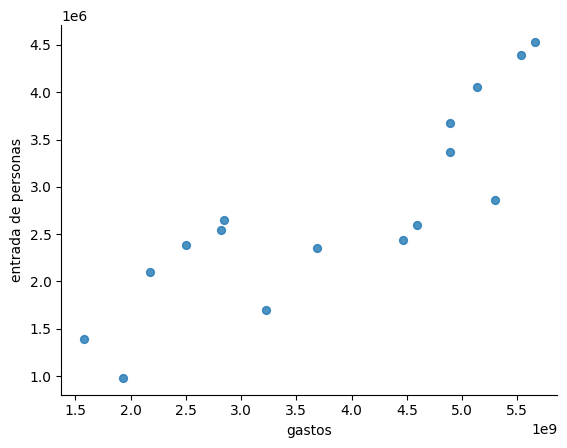

In [141]:
# @title utiliad vs entrada de personas

from matplotlib import pyplot as plt
datos.plot(kind='scatter', x='gastos', y='entrada de personas', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

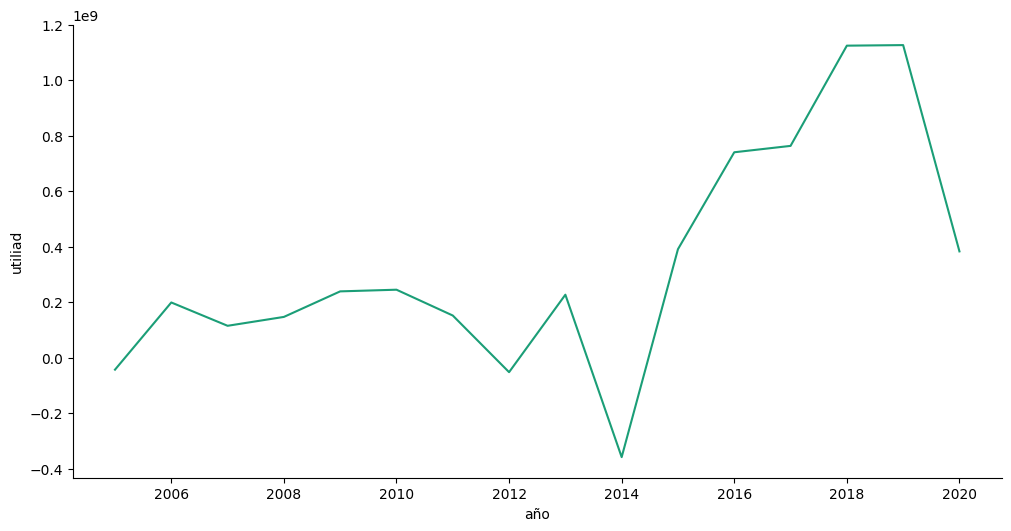

In [142]:
# @title año vs utiliad

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['año']
  ys = series['utiliad']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = datos.sort_values('año', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('año')
_ = plt.ylabel('utiliad')

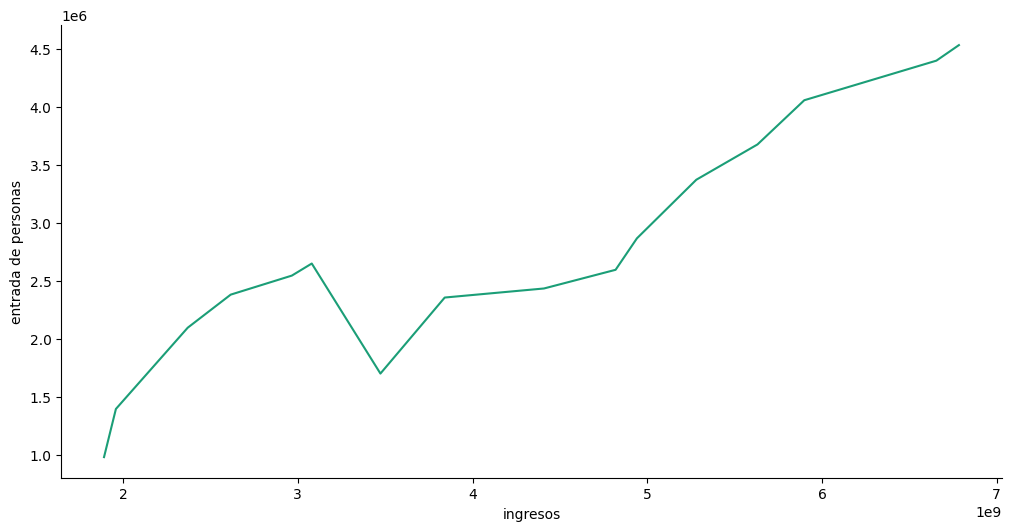

In [143]:
# @title ingresos vs entradad e personas

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ingresos']
  ys = series['entrada de personas']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = datos.sort_values('ingresos', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ingresos')
_ = plt.ylabel('entrada de personas')

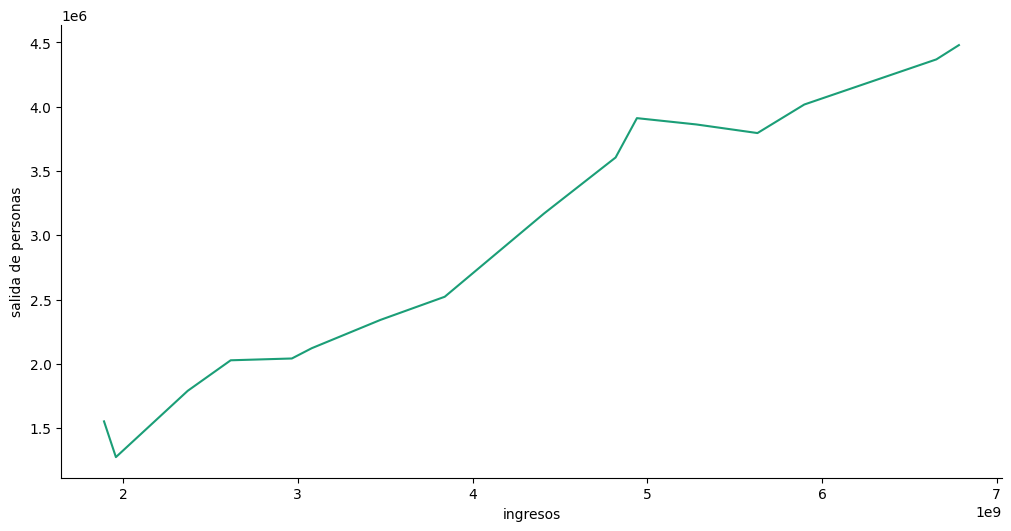

In [144]:
# @title ingresos vs salida de personas

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ingresos']
  ys = series['salida de personas']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = datos.sort_values('ingresos', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ingresos')
_ = plt.ylabel('salida de personas')

In [145]:
c1=datos['ingresos']
c2=datos['entrada de personas']
c3=datos['salida de personas']


In [146]:
# Preprocesado y modelado
# ==============================================================================
import statsmodels as sm
from statsmodels.api import add_constant
from statsmodels.api import OLS
from statsmodels.formula.api import ols
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.anova as  smf

In [147]:
data = pd.DataFrame({'y': c1, 'x1': c2, 'x2': c3})

model = ols("y ~ x1 + x2", data).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)


plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     320.1
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           8.76e-12
Time:                        01:21:06   Log-Likelihood:                -330.15
No. Observations:                  16   AIC:                             666.3
Df Residuals:                      13   BIC:                             668.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.765e+08   1.87e+08     -1.480      0.1

In [148]:
corre= datos.corr()
corre

,año,ingresos,gastos,utiliad,entrada de personas,salida de personas,flujo de turismo,cobertura
año,1.000000,0.690418,0.614162,0.647942,0.619894,0.637662,-0.100232,0.668858
ingresos,0.690418,1.000000,0.974431,0.652056,0.919839,0.983973,-0.228254,0.303950
gastos,0.614162,0.974431,1.000000,0.465034,0.853041,0.990890,-0.376700,0.100189
utiliad,0.647942,0.652056,0.465034,1.000000,0.745827,0.533369,0.371771,0.859532
entrada de personas,0.619894,0.919839,0.853041,0.745827,1.000000,0.882738,0.145570,0.436558
salida de personas,0.637662,0.983973,0.990890,0.533369,0.882738,1.000000,-0.336360,0.171784
flujo de turismo,-0.100232,-0.228254,-0.376700,0.371771,0.145570,-0.336360,1.000000,0.513268
cobertura,0.668858,0.303950,0.100189,0.859532,0.436558,0.171784,0.513268,1.000000


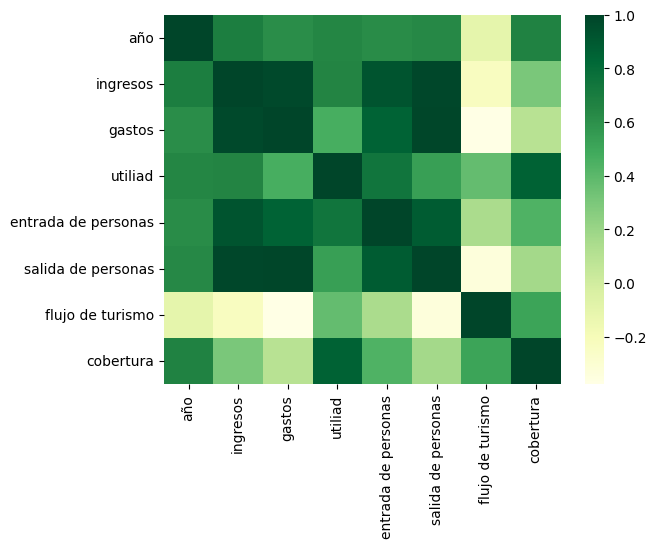

In [149]:
sns.heatmap(corre, cmap= "YlGn");

In [152]:
datos_empleos = pd.read_excel("/content/DATOS EMPLEADOS.xlsx")   #dataFrame
datos_empleos.head()

,SUBCATEGORIA,NOMDEP,NOMBRE-MUNI,EMPLEADOS
0,AGENCIAS DE VIAJES Y DE TURISMO,BOGOTA,BOGOTA,6.0
1,AGENCIAS DE VIAJES Y DE TURISMO,SAN ANDRES Y PROVIDENCIA,SAN ANDRES,10.0
2,AGENCIAS DE VIAJES Y DE TURISMO,BOGOTA,BOGOTA,300.0
3,OFICINA DE REPRESENTACION TURISTICA,BOGOTA,BOGOTA,6.0
4,OFICINA DE REPRESENTACION TURISTICA,BOGOTA,BOGOTA,1.0


In [166]:
datos_empleos = datos_empleos[datos_empleos['NOMDEP'] != 'NO DETERMINADO']

In [167]:
# Solicito información general de la base de datos
datos_empleos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466465 entries, 0 to 466471
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   SUBCATEGORIA  466465 non-null  object 
 1   NOMDEP        466465 non-null  object 
 2   NOMBRE-MUNI   466465 non-null  object 
 3   EMPLEADOS     465653 non-null  float64
dtypes: float64(1), object(3)
memory usage: 17.8+ MB


In [168]:
# Estadísticas descriptivas de las tres variables cuantitativas
datos_empleos.describe()

,EMPLEADOS
count,4.656530e+05
mean,3.044650e+02
std,1.236022e+05
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,7.927488e+07


In [173]:
depto = []
peso = []
DATOS_DEP= (datos_empleos['NOMDEP']).unique().tolist()
total = len(datos_empleos['NOMDEP'])

for i in DATOS_DEP:
    depto.append(i)
    a = (len(datos_empleos[datos_empleos['NOMDEP']== i]))/total
    peso.append(a)

nuevodf = pd.DataFrame()

nuevodf['DEPTO'] = depto
nuevodf['Peso'] = peso

In [174]:
nuevodf

,DEPTO,Peso
0,BOGOTA,0.144718
1,SAN ANDRES Y PROVIDENCIA,0.026879
2,NORTE DESANTANDER,0.018334
3,MAGDALENA,0.067784
4,ANTIOQUIA,0.132124
5,CAUCA,0.006551
6,META,0.031657
7,BOLIVAR,0.088097
8,VALLE DEL CAUCA,0.061012
9,ATLANTICO,0.018981


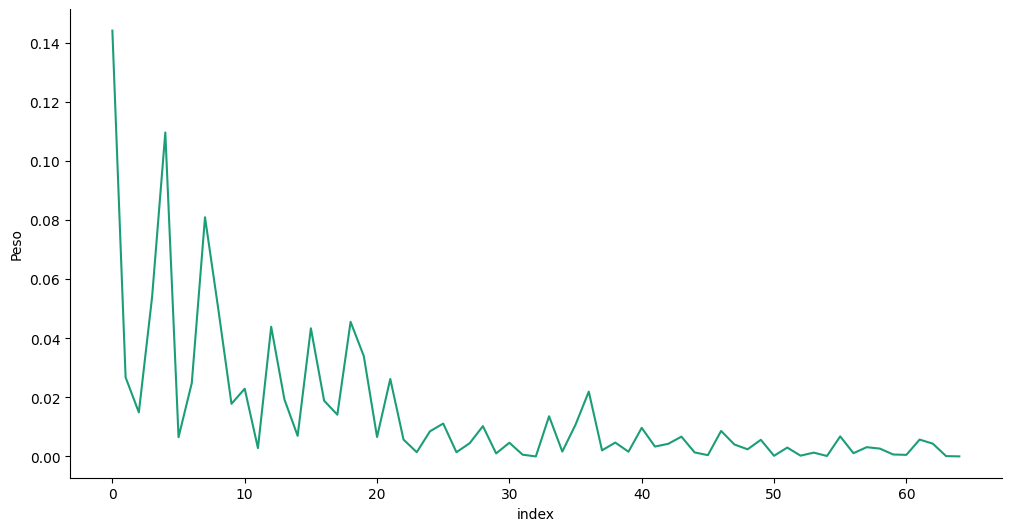

In [175]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Peso']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Peso')

In [176]:
nuevodf[nuevodf['Peso'] >= 0.05]

,DEPTO,Peso
0,BOGOTA,0.144718
3,MAGDALENA,0.067784
4,ANTIOQUIA,0.132124
7,BOLIVAR,0.088097
8,VALLE DEL CAUCA,0.061012
15,SANTANDER,0.053262
18,CUNDINAMARCA,0.054409


In [177]:
list((nuevodf['DEPTO'])[nuevodf['Peso'] >= 0.05])

['BOGOTA',
 'MAGDALENA',
 'ANTIOQUIA',
 'BOLIVAR',
 'VALLE DEL CAUCA',
 'SANTANDER',
 'CUNDINAMARCA']

In [178]:
list((nuevodf['DEPTO'])[nuevodf['Peso'] < 0.05])

['SAN ANDRES Y PROVIDENCIA',
 'NORTE DESANTANDER',
 'CAUCA',
 'META',
 'ATLANTICO',
 'RISARALDA',
 'LA GUAJIRA',
 'QUINDIO',
 'HUILA',
 'CESAR',
 'CALDAS',
 'NARIÑO',
 'BOYACA',
 'CHOCO',
 'TOLIMA',
 'AMAZONAS',
 'ARAUCA',
 'CORDOBA',
 'SUCRE',
 'GUAVIARE',
 'CAQUETA',
 'CASANARE',
 'VICHADA',
 'PUTUMAYO',
 'GUAINIA',
 'Cauca',
 'Guainia',
 'GUAJIRA',
 'VAUPES']

In [179]:
dic = {'BOGOTA':'BOGOTA', 'MAGDALENA':'MAGDALENA', 'ANTIOQUIA': 'ANTIOQUIA', 'BOLIVAR':'BOLIVAR' , 'VALLE DEL CAUCA':'VALLE DEL CAUCA', 'CUNDINAMARCA': 'CUNDINAMARCA', 'SANTANDER': 'SANTANDER', 'CHOCO': 'OTRO', 'SAN ANDRES Y PROVIDENCIA': 'OTRO' , 'NORTE DESANTANDER': 'OTRO','CAUCA': 'OTRO',  'META': 'OTRO','ATLANTICO': 'OTRO', 'RISARALDA': 'OTRO', 'LA GUAJIRA': 'OTRO', 'QUINDIO': 'OTRO', 'HUILA': 'OTRO', 'CESAR': 'OTRO', 'CALDAS': 'OTRO', 'NARIÑO': 'OTRO', 'BOYACA': 'OTRO', 'CHOCO': 'OTRO', 'TOLIMA': 'OTRO', 'AMAZONAS': 'OTRO', 'ARAUCA': 'OTRO', 'CORDOBA': 'OTRO', 'SUCRE': 'OTRO', 'GUAVIARE': 'OTRO', 'CAQUETA': 'OTRO', 'CASANARE': 'OTRO', 'VICHADA': 'OTRO', 'PUTUMAYO': 'OTRO',  'GUAINIA': 'OTRO', 'Cauca': 'OTRO',  'Guainia': 'OTRO', 'GUAJIRA': 'OTRO', 'VAUPES':'OTRO'}

In [180]:
datos_empleos['Categoria'] = (datos_empleos['NOMDEP']).map(dic)
datos_empleos.head()

,SUBCATEGORIA,NOMDEP,NOMBRE-MUNI,EMPLEADOS,Categoria
0,AGENCIAS DE VIAJES Y DE TURISMO,BOGOTA,BOGOTA,6.0,BOGOTA
1,AGENCIAS DE VIAJES Y DE TURISMO,SAN ANDRES Y PROVIDENCIA,SAN ANDRES,10.0,OTRO
2,AGENCIAS DE VIAJES Y DE TURISMO,BOGOTA,BOGOTA,300.0,BOGOTA
3,OFICINA DE REPRESENTACION TURISTICA,BOGOTA,BOGOTA,6.0,BOGOTA
4,OFICINA DE REPRESENTACION TURISTICA,BOGOTA,BOGOTA,1.0,BOGOTA


from matplotlib import pyplot as plt
_df_29['EMPLEADOS'].plot(kind='hist', bins=20, title='EMPLEADOS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_30.groupby('SUBCATEGORIA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_31.groupby('NOMDEP').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('NOMBRE-MUNI').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('Categoria').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['EMPLEADOS'].plot(kind='line', figsize=(8, 4), title='EMPLEADOS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['NOMDEP'].value_counts()
    for x_label, grp in _df_35.groupby('SUBCATEGORIA')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('SUBCATEGORIA')
_ = plt.ylabel('NOMDEP')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['NOMBRE-MUNI'].value_counts()
    for x_label, grp in _df_36.groupby('NOMDEP')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('NOMDEP')
_ = plt.ylabel('NOMBRE-MUNI')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Categoria'].value_counts()
    for x_label, grp in _df_37.groupby('NOMBRE-MUNI')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('NOMBRE-MUNI')
_ = plt.ylabel('Categoria')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['SUBCATEGORIA'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='EMPLEADOS', y='SUBCATEGORIA', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['NOMDEP'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='EMPLEADOS', y='NOMDEP', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40['NOMBRE-MUNI'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x='EMPLEADOS', y='NOMBRE-MUNI', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_41['Categoria'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_41, x='EMPLEADOS', y='Categoria', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [182]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Diagrama de torta Categoria')

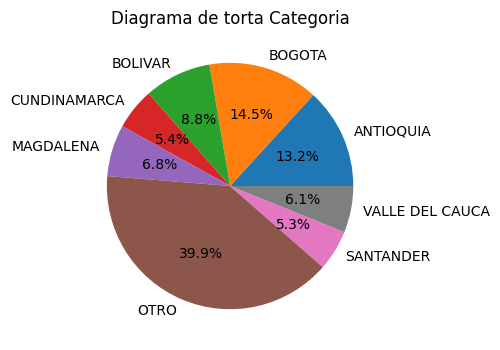

In [210]:
# Realizo un gráfico de torta
categoria, counts = np.unique(datos_empleos['Categoria'], return_counts=True)
categoria, counts
fig = plt.figure(figsize=(4,4))
_ = plt.pie(counts, labels=categoria, autopct='%.1f%%')
plt.title('Diagrama de torta Categoria')

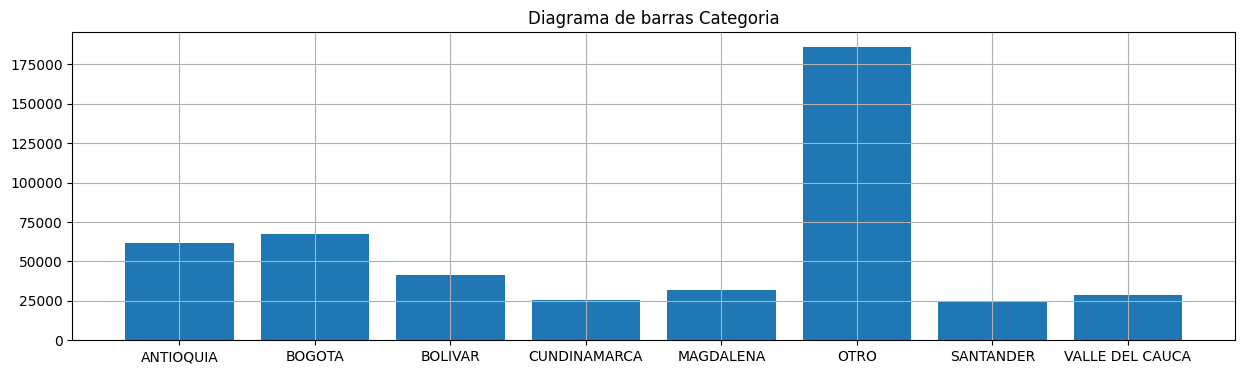

In [211]:
fig = plt.figure(figsize=(15,4))
_ = plt.bar(categoria, counts)
plt.grid()
_ = plt.title('Diagrama de barras Categoria')

In [192]:
np.sum((datos_empleos['EMPLEADOS'])[datos_empleos['Categoria']== 'BOGOTA'])

632624.0

In [200]:
np.sum((datos_empleos['EMPLEADOS'])[datos_empleos['Categoria']== 'ANTIOQUIA'])

22811603.0

In [201]:
np.sum((datos_empleos['EMPLEADOS'])[datos_empleos['Categoria']== 'BOLIVAR'])

229554.0

In [202]:
np.sum((datos_empleos['EMPLEADOS'])[datos_empleos['Categoria']== 'CUNDINAMARCA'])

108258.0

In [203]:
np.sum((datos_empleos['EMPLEADOS'])[datos_empleos['Categoria']== 'MAGDALENA'])

10378589.0

In [204]:
np.sum((datos_empleos['EMPLEADOS'])[datos_empleos['Categoria']== 'SANTANDER'])

105582.0

In [205]:
np.sum((datos_empleos['EMPLEADOS'])[datos_empleos['Categoria']== 'VALLE DEL CAUCA'])

174061.0

In [223]:
(datos_empleos.groupby( ['Categoria']).sum('EMPLEADOS'))

,EMPLEADOS
Categoria,
ANTIOQUIA,22811603.0
BOGOTA,632624.0
BOLIVAR,229554.0
CUNDINAMARCA,108258.0
MAGDALENA,10378589.0
OTRO,107334779.0
SANTANDER,105582.0
VALLE DEL CAUCA,174061.0


<Axes: xlabel='Categoria'>

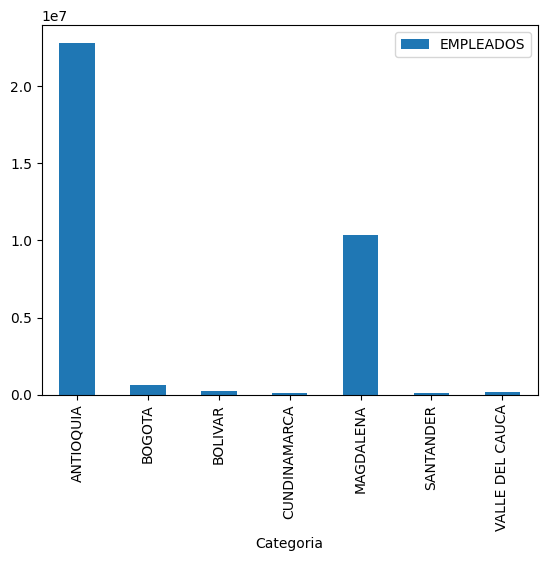

In [218]:
((datos_empleos[datos_empleos['Categoria'] != 'OTRO']).groupby( ['Categoria']).sum(['EMPLEADOS'])).plot.bar()

In [225]:
((datos_empleos[datos_empleos['Categoria'] != 'OTRO']).groupby( ['Categoria']).sum(['EMPLEADOS']))

,EMPLEADOS
Categoria,
ANTIOQUIA,22811603.0
BOGOTA,632624.0
BOLIVAR,229554.0
CUNDINAMARCA,108258.0
MAGDALENA,10378589.0
SANTANDER,105582.0
VALLE DEL CAUCA,174061.0


Text(0.5, 1.0, 'Diagrama de torta empleados')

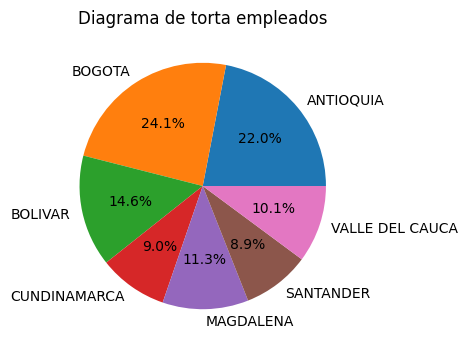

In [230]:
# Realizo un gráfico de torta
imc_group, empleados_por_ciudad = np.unique((datos_empleos['Categoria'])[datos_empleos['Categoria'] != 'OTRO'], return_counts=True)
imc_group, empleados_por_ciudad
fig = plt.figure(figsize=(4,4))
_ = plt.pie(empleados_por_ciudad, labels=imc_group, autopct='%.1f%%')
plt.title('Diagrama de torta empleados')